In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
from torch import functional as F
from VGG import VGGLoss
import os


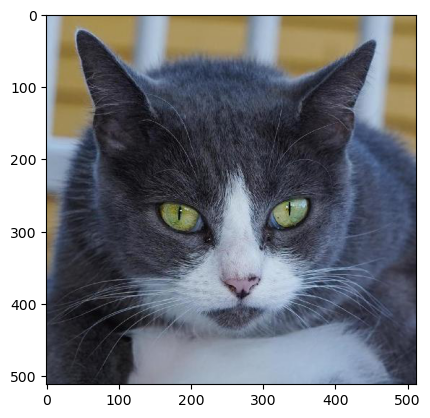

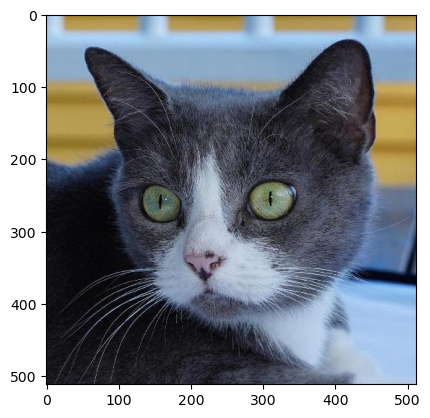

3.584294319152832


In [6]:
pic1 = "HR_images\\flickr_cat_000005.jpg"
# pic2 = "building.jpg"
pic2 = "HR_images\\flickr_cat_000006.jpg"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load image with matplotlib
img = plt.imread(pic1)
plt.imshow(img)
plt.show()
img = plt.imread(pic2)
plt.imshow(img)
plt.show()


# Load the image
img1 = Image.open(pic1)
# img1.show()
im2 = Image.open(pic2).resize(img1.size)
# im2.show()

# Convert the image to a tensor
transform = transforms.ToTensor()
img1 = transform(img1)
img2 = transform(im2)

# Add a batch dimension
img1 = img1.unsqueeze(0).to(device)
img2 = img2.unsqueeze(0).to(device)

vgg = VGGLoss(device)
print(vgg(img1, img2).item())


In [3]:
directory = "HR_images"
max = -1
min = 999999
max_im = ""
min_im = ""
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".jpg"):
        img2 = Image.open(os.path.join(directory, filename))
        img2 = transform(img2)
        img2 = img2.unsqueeze(0).to(device)
        temp = vgg(img1, img2).item()
        if temp > max:
            max = temp
            max_im = filename
        if temp < min:
            min = temp
            min_im = filename
        continue
    else:
        continue




KeyboardInterrupt: 

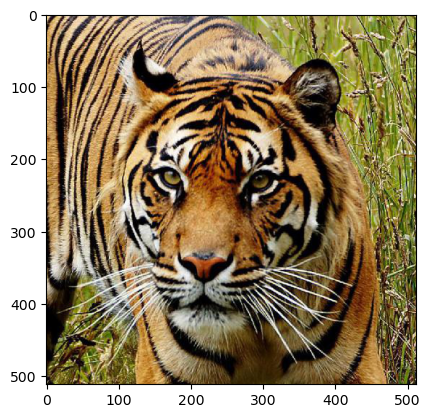

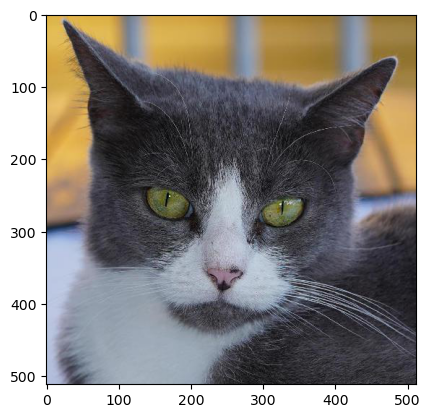

9.593480110168457


In [5]:
max_im_path = os.path.join(directory, max_im)
min_im_path = os.path.join(directory, min_im)

img1 = plt.imread(max_im_path)
plt.imshow(img1)
plt.show()
img1 = plt.imread(min_im_path)
plt.imshow(img1)
plt.show()
print(max)